In [2]:
#import libraries
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [3]:
#import dataset
normal = pd.read_csv('ptbdb_normal.csv')
abnormal = pd.read_csv('ptbdb_abnormal.csv')

In [4]:
#print dataset
print("size Normal => ", normal.shape)
print("size Abnormal => ", abnormal.shape)
abs(abnormal).head(5)

size Normal =>  (4045, 188)
size Abnormal =>  (10505, 188)


,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Ubah data menjadi domain frekuensi
kelas_normal = normal.iloc[:,187].values
normal_data = normal.drop(normal.columns[187], axis= 1)
normal_fft = fft(normal_data)
normal_fft = abs(normal_fft)

kelas_abnormal = abnormal.iloc[:, 187].values
abnormal_data = abnormal.drop(abnormal.columns[187], axis= 1)
abnormal_fft = fft(abnormal_data)
abnormal_fft = abs(abnormal_fft)

t = pd.DataFrame(abnormal_fft)

Text(0.5, 1.0, 'Detak Jantung Abnormal pada Sebelum FFT')

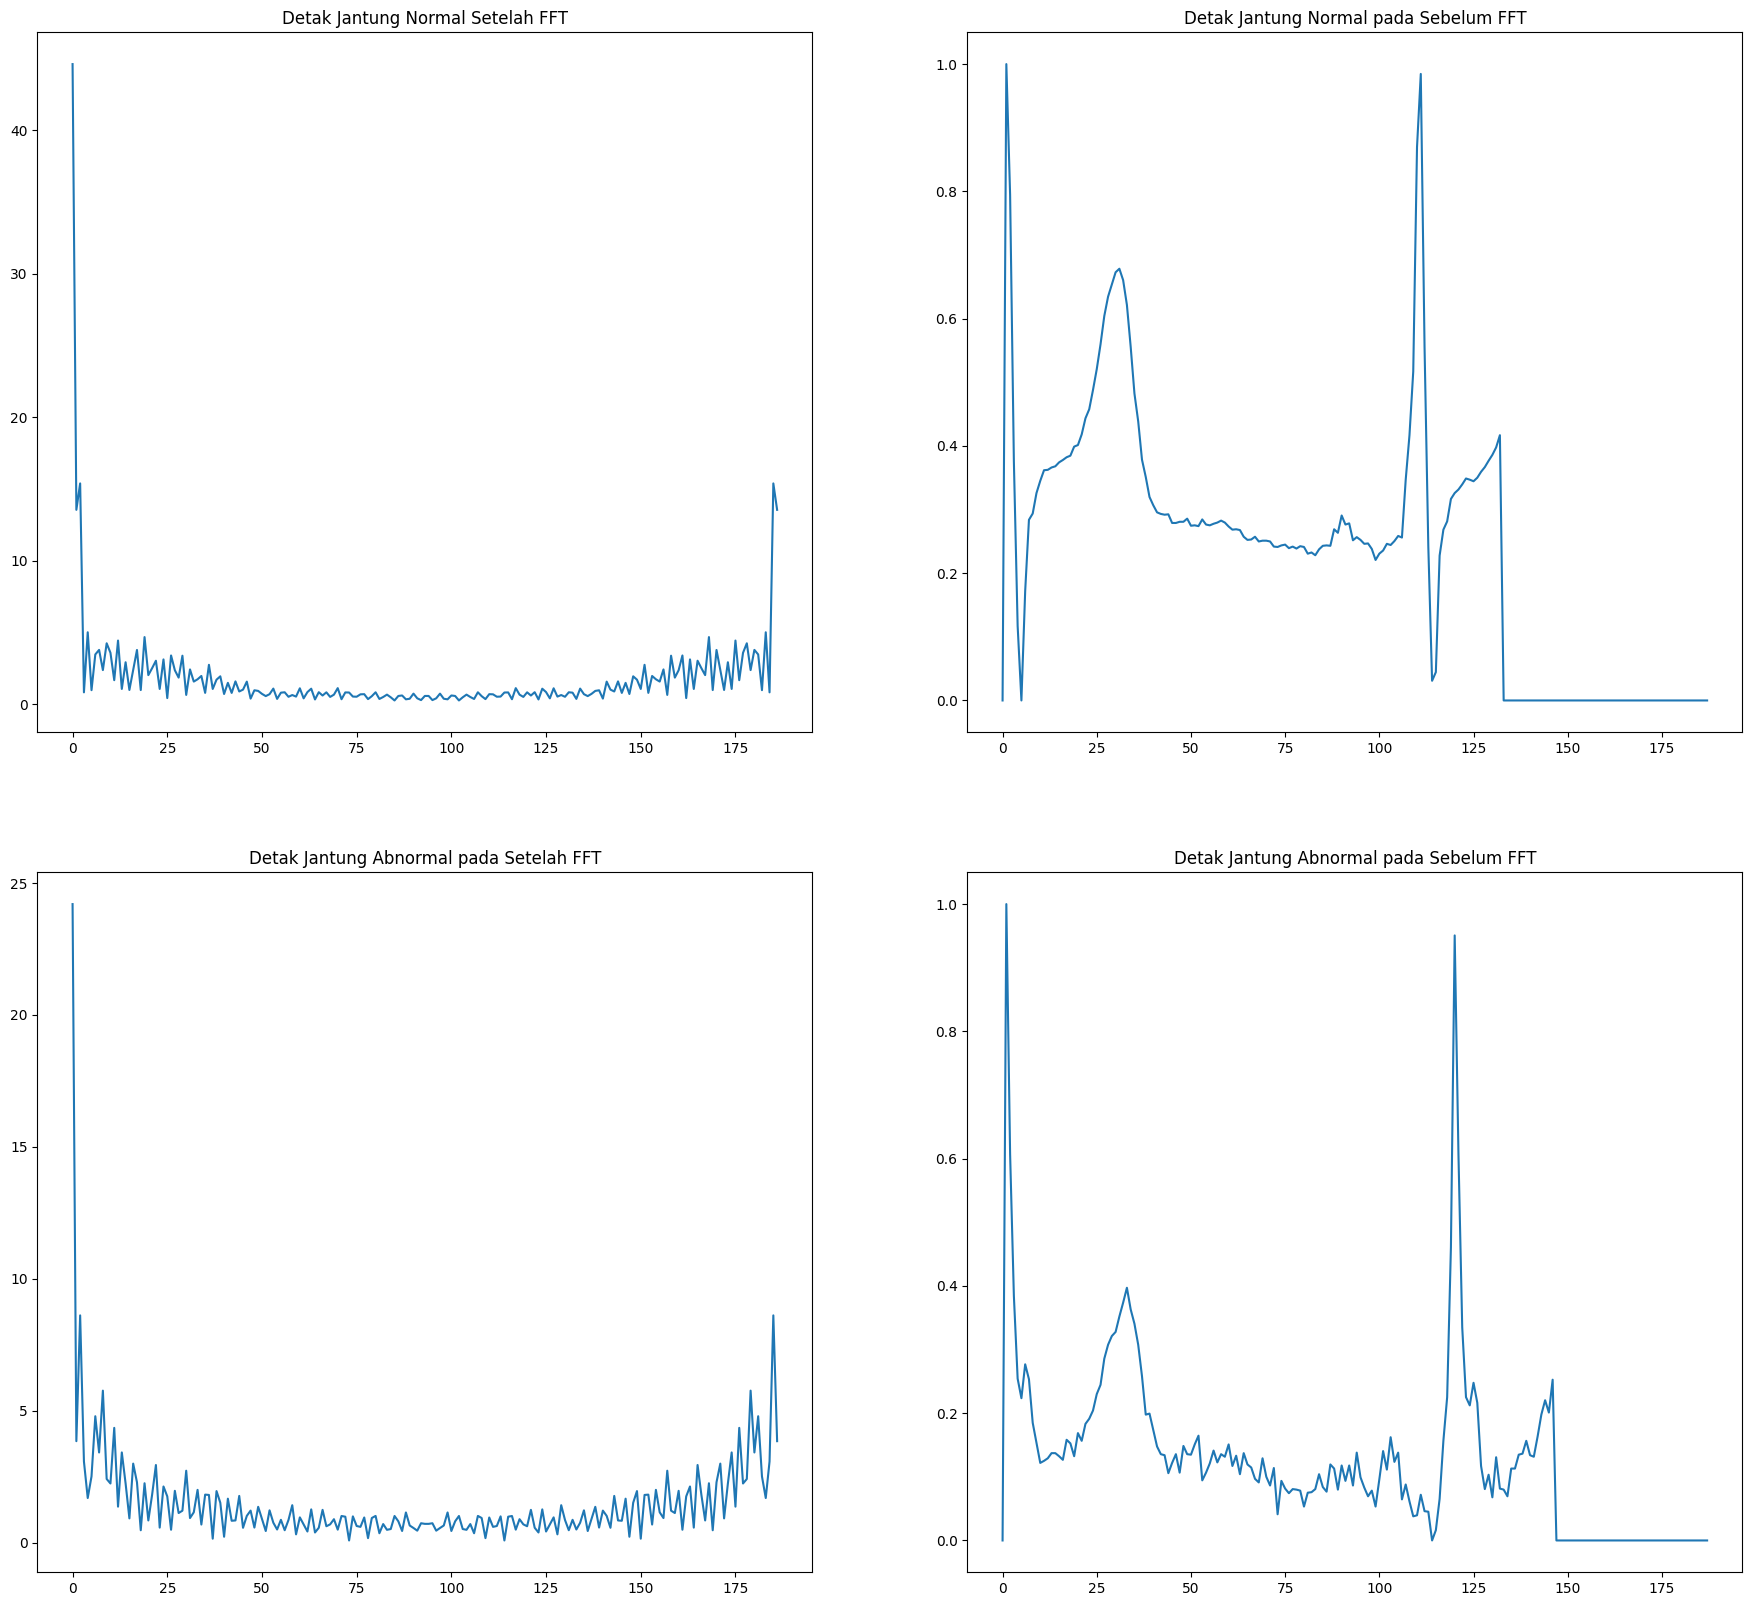

In [6]:
#perbandingan sinyal setelah dan sebelum menggunakan FFT
fig, axis = plt.subplots(2, 2, figsize=(22, 20))

axis[0,0].plot(range(0, len(normal_fft[0,:])), normal_fft[0,:])
axis[0,0].set_title("Detak Jantung Normal Setelah FFT")

normal_data = normal_data.reset_index()
axis[0, 1].plot(range(len(normal_data.iloc[0, :])), normal_data.iloc[0, :])
axis[0, 1].set_title("Detak Jantung Normal pada Sebelum FFT")

axis[1,0].plot(range(0, len(abnormal_fft[0,:])), abnormal_fft[0,:])
axis[1,0].set_title("Detak Jantung Abnormal pada Setelah FFT")

abnormal_data = abnormal_data.reset_index()
axis[1,1].plot(range(len(abnormal_data.iloc[0, :])), abnormal_data.iloc[0, :])
axis[1,1].set_title("Detak Jantung Abnormal pada Sebelum FFT")

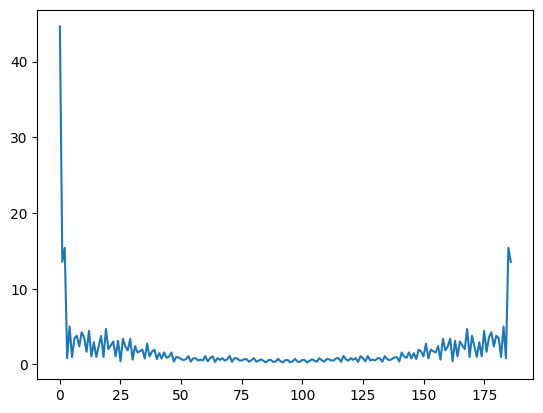

0      44.625850
1      13.554669
2      15.396179
3       0.832166
4       5.020041
         ...    
182     0.984205
183     5.020041
184     0.832166
185    15.396179
186    13.554669
Name: 0, Length: 187, dtype: float64


In [7]:
#Proses data normal dan abnormal
#data normal
frame_normal_fft = pd.DataFrame(data= normal_fft)
frame_normal_fft["class"] = kelas_normal

#data abnormal
frame_abnormal_fft = pd.DataFrame(data= abnormal_fft)
frame_abnormal_fft["class"] = kelas_abnormal

#meyatukan dua data
total_each_data = 8000
merged_data = pd.concat([frame_normal_fft.iloc[0: total_each_data, :], frame_abnormal_fft.iloc[0: total_each_data, :]])
plt.plot(merged_data.iloc[0,: 187])
plt.show()
print(merged_data.iloc[0,: 187])

In [8]:
#Membuat Fungsi Normalisasi
def normalisasi(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data) + 0.00000001)

In [9]:
#Masukkan Fungsi Normalisasi
target = merged_data["class"]
no_label_data = merged_data.iloc[:, :187]
data_ternomalisasi = normalisasi(no_label_data.T)

data_ternomalisasi = pd.DataFrame(data_ternomalisasi.T)
data_ternomalisasi["class"] = target

def plot():
    plt.plot(data_ternomalisasi.iloc[:, :187])
    
plt.show()
data_ternomalisasi.iloc[:, :187]

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.354419,0.107643,0.122269,0.006597,0.039859,0.007805,0.027575,0.030099,0.018931,0.033758,...,0.028496,0.033758,0.018931,0.030099,0.027575,0.007805,0.039859,0.006597,0.122269,0.107643
1,0.242862,0.017962,0.056292,0.030267,0.020350,0.029005,0.027667,0.037272,0.031439,0.030915,...,0.013305,0.030915,0.031439,0.037272,0.027667,0.029005,0.020350,0.030267,0.056292,0.017962
2,0.109186,0.015947,0.045154,0.017096,0.030541,0.016662,0.030844,0.040882,0.010927,0.021990,...,0.030127,0.021990,0.010927,0.040882,0.030844,0.016662,0.030541,0.017096,0.045154,0.015947
3,0.151408,0.023751,0.048433,0.025599,0.032672,0.023524,0.030250,0.048020,0.018950,0.019409,...,0.028026,0.019409,0.018950,0.048020,0.030250,0.023524,0.032672,0.025599,0.048433,0.023751
4,0.170715,0.041167,0.070586,0.006427,0.012400,0.009315,0.040346,0.018796,0.046724,0.016820,...,0.017157,0.016820,0.046724,0.018796,0.040346,0.009315,0.012400,0.006427,0.070586,0.041167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.495255,0.314055,0.025453,0.114567,0.009278,0.096251,0.027547,0.053829,0.029347,0.023651,...,0.009525,0.023651,0.029347,0.053829,0.027547,0.096251,0.009278,0.114567,0.025453,0.314055
7996,0.386739,0.109710,0.082741,0.024405,0.012041,0.007524,0.020739,0.007039,0.023431,0.023569,...,0.023924,0.023569,0.023431,0.007039,0.020739,0.007524,0.012041,0.024405,0.082741,0.109710
7997,0.258808,0.095990,0.074670,0.011856,0.056986,0.032927,0.041179,0.029940,0.027281,0.038533,...,0.025261,0.038533,0.027281,0.029940,0.041179,0.032927,0.056986,0.011856,0.074670,0.095990
7998,0.138730,0.094741,0.016452,0.037912,0.015504,0.026987,0.024597,0.016498,0.035286,0.018733,...,0.017906,0.018733,0.035286,0.016498,0.024597,0.026987,0.015504,0.037912,0.016452,0.094741


In [10]:
#Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_ternomalisasi.iloc[:, :187], data_ternomalisasi["class"], test_size= 0.2, random_state=42)

TRAINING DATA

In [11]:
#Training Data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

2023-11-27 22:21:10.576378: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 22:21:10.606991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 22:21:10.607035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 22:21:10.607051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 22:21:10.612152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 22:21:10.612989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [12]:
##Definisikan model/struktur ANN kita
# input_shape = (data_ternomalisasi.iloc[:, 188:].shape[1], 1)
def struk_mod(input_shape):
    model = keras.models.Sequential()
    # model.add(Dense(units=input_shape, activation="relu"))
    model.add(Dense(units=32, activation="relu", input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))

# def residualModel/struk_mod(input_shape):
#     model = keras.models.Sequential()
#     model.add(Flatten(input_shape=input_shape))

#     dense1 = Dense(32, activation="relu")(model.output)
#     drop1 = Dropout(0.5)(dense1)

#     dense2 = Dense(64, activation="relu")(drop1)
#     drop2 = Dropout(0.5)(dense2)

#     dense3 = Dense(1, activation="sigmoid")(drop2)

#     model = Model(inputs=model.inputs, outputs=dense3)
#     return model

    return model

In [13]:
input_shape = (data_ternomalisasi.iloc[:, :187].shape[1],)

In [14]:
model = struk_mod(input_shape)
# model = struk_mod(input_shape=187)

2023-11-27 22:21:12.346669: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-27 22:21:12.376688: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [16]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=50, min_delta=0.001, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500, batch_size=32, shuffle=True, callbacks=[early_stop_cb, checkpoint_cb])

Epoch 1/500


302/302 [==============================] - 2s 4ms/step - loss: 0.5980 - accuracy: 0.6817 - val_loss: 0.5110 - val_accuracy: 0.7684
Epoch 2/500
 70/302 [=====>........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.7701

/home/mayuka/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


302/302 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7731 - val_loss: 0.4678 - val_accuracy: 0.7825
Epoch 3/500
302/302 [==============================] - 1s 3ms/step - loss: 0.4427 - accuracy: 0.7893 - val_loss: 0.4311 - val_accuracy: 0.7916
Epoch 4/500
302/302 [==============================] - 1s 3ms/step - loss: 0.4294 - accuracy: 0.7962 - val_loss: 0.4279 - val_accuracy: 0.7870
Epoch 5/500
302/302 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8016 - val_loss: 0.4349 - val_accuracy: 0.7954
Epoch 6/500
302/302 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8127 - val_loss: 0.3901 - val_accuracy: 0.8103
Epoch 7/500
302/302 [==============================] - 1s 3ms/step - loss: 0.3883 - accuracy: 0.8207 - val_loss: 0.3800 - val_accuracy: 0.8194
Epoch 8/500
302/302 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8290 - val_loss: 0.3811 - val_accuracy: 0.8252
Epoch 9/500

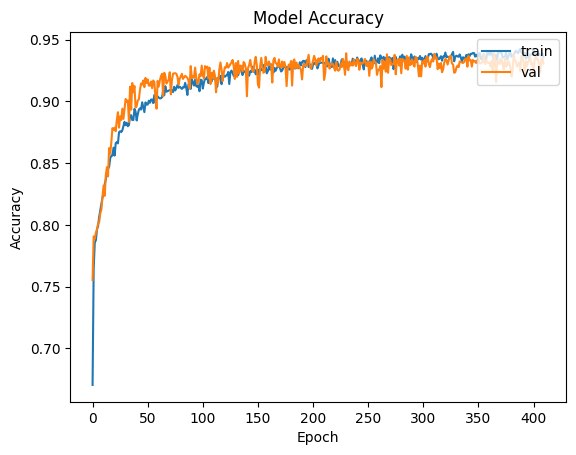

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()

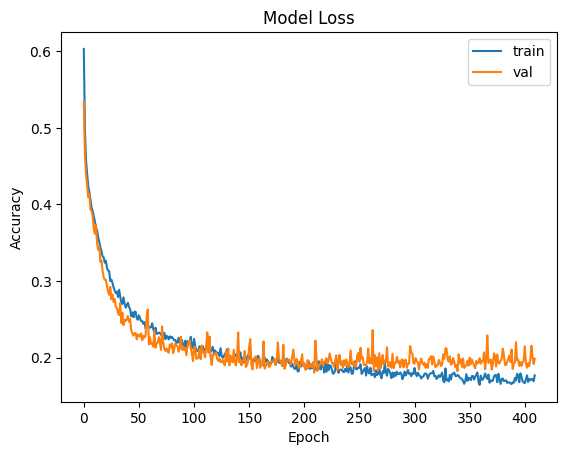

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()

TEST DATA

In [ ]:
y_yard = model.predict(X_test)
y_yard_pred = pd.DataFrame(y_yard)
y_yard_train = model.predict(X_train)
y_yard_train_result = pd.DataFrame(y_yard_train)

#Masukkan klasifikasi
y_yard_pred = y_yard_pred[0].transform(lambda x: "normal" if x < 0.5 else "abnormal")
y_yard_train_result = y_yard_train_result[0].transform(lambda x: "normal" if x < 0.5 else "abnormal")
print(y_yard_pred)


302/302 [==============================] - 0s 1ms/step
0       abnormal
1       abnormal
2       abnormal
3         normal
4       abnormal
          ...   
2404    abnormal
2405      normal
2406      normal
2407    abnormal
2408    abnormal
Name: 0, Length: 2409, dtype: object


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

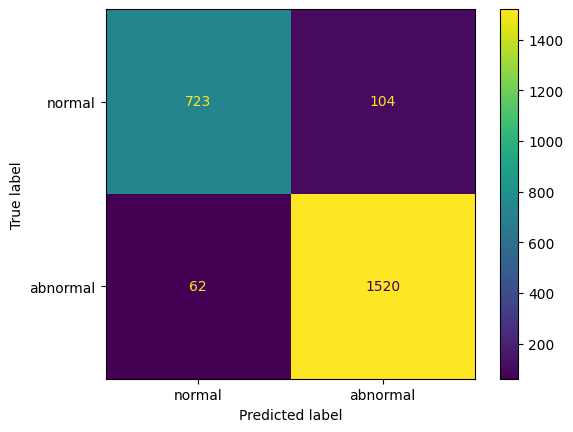

In [ ]:
hasil_ptb = {0. : "Normal",
            1. : "Abnormal"}

y_true = y_test.transform(lambda x: "normal" if x < 0.5 else "abnormal")
y_train_true = y_train.transform(lambda x: "normal" if x < 0.5 else "abnormal")

matrix = confusion_matrix(y_true=y_true, y_pred=y_yard_pred, labels=["normal", "abnormal"])
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["normal", "abnormal"])
matrix_plot.plot()

In [ ]:
tn, fp, fn, tp = matrix.ravel()
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative : ", fn)
print("True Positive : ", tp)

True Negative :  723
False Positive :  104
False Negative :  62
True Positive :  1520


In [ ]:
print("====== DATA TEST ======")
print(classification_report(y_true, y_yard_pred, target_names=[hasil_ptb[i] for i in hasil_ptb]))
print("====== DATA TRAIN ======")
print(classification_report(y_train_true, y_yard_train_result, target_names=[hasil_ptb[i] for i in hasil_ptb]))

====== DATA TEST ======
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95      1582
    Abnormal       0.92      0.87      0.90       827

    accuracy                           0.93      2409
   macro avg       0.93      0.92      0.92      2409
weighted avg       0.93      0.93      0.93      2409

====== DATA TRAIN ======
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      6418
    Abnormal       0.97      0.91      0.94      3218

    accuracy                           0.96      9636
   macro avg       0.96      0.95      0.96      9636
weighted avg       0.96      0.96      0.96      9636

